In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from IPython.display import Image
from IPython.display import set_matplotlib_formats, display
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import os
import mglearn
%matplotlib inline

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [4]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [5]:
from sklearn.tree import export_graphviz

path = os.getcwd()
path = os.path.join(path, "tree.dot")
export_graphviz(tree,
                out_file=path,
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)


In [6]:

with open(path) as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [8]:
print("Feature importances:\n {}".format(tree.feature_importances_))

Feature importances:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


NameError: name 'plt_xlabel' is not defined

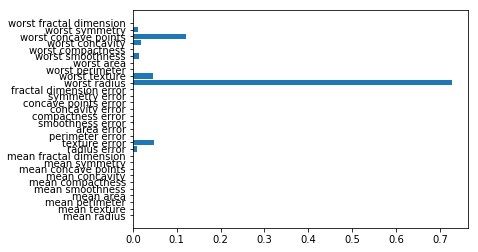

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),
             model.feature_importances_,
             align="center")
    
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt_xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

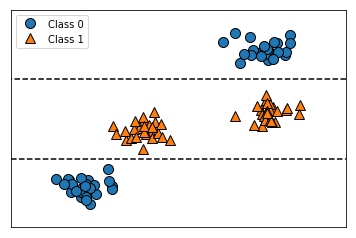

In [13]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)